# Import Relevant Libraries

In [1]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from math import pi
import time 
import pickle

from nintendo.trend_radar_functions import (
    reset_index, 
    json_to_df, 
    combine_2_dfs,
    add_time_to_df,
    unique_seconds_list, 
    second_groupings, 
    seconds_dict, 
    unique_words_list,
    vectorize_to_df,
    words_df,
    trend_line,
    drop_time_from_df,
    create_dictionary_for_specified_time,
    top_5_dict_to_df,
    radar_plot_creator,
    completed_words_df,
    trend_function,
    radar_function,
    )                             

.

.

# Master Functions at Bottom of Notebook

.

.

# Load Cleaned DataFrame     
Cleaned = no hashtages, web links, @s... no punctuation, lowercase, lemmatized and no stop words

In [2]:
import pickle

with open('cleaned_twitter_df2.pkl', 'rb') as f:
    df = pickle.load(f)

# Load Vader Output

In [3]:
import pickle

with open('vader_output.pkl', 'rb') as f:
    vader_output = pickle.load(f)

Append vader outputs to original dataframe   
* Reset index of original df
* Turned vader sentiments json into df

In [4]:
df = combine_2_dfs(reset_index(df),json_to_df(vader_output))

Create new .time. column showing hours, minutes, seconds

In [5]:
df = add_time_to_df(df)

# Trend Lines

List of every unique second in the data

In [6]:
unique_sec_list = unique_seconds_list(df)

Append second grouping dictionaries to the dataframe in new columns

In [7]:
all_relevant_seconds_for_grouping = [5,15,30,60,120,180,300,600,900,
                                     1200,1800,2400,3000,3600]

for i in all_relevant_seconds_for_grouping:
    df[str(i)+'_seconds'] = df['.time.'].map(seconds_dict(i, unique_sec_list))

Create SUM Trend Lines (5 second intervals)

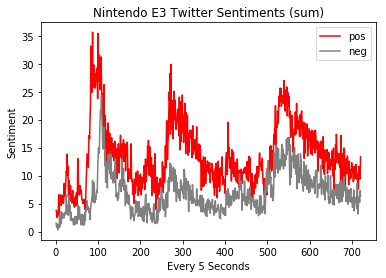

In [8]:
trend_line(df, 5, 'sum')

Create MEAN Trend Lines (5 second intervals)

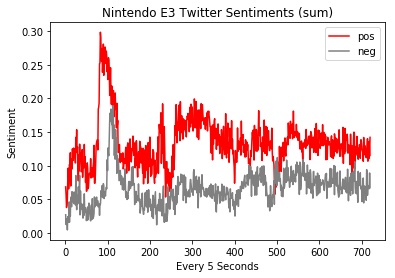

In [9]:
trend_line(df, 5, 'mean')

# Words DataFrame

In [10]:
words_df = words_df(df)

There are duplicate .time. columns, remove and replace

In [13]:
words_df = drop_time_from_df(words_df)
words_df = add_time_to_df(words_df)

# Radar Plots

imputs: df, time=which X min slot, seconds=length of time, which_five='top' or 'bottom'

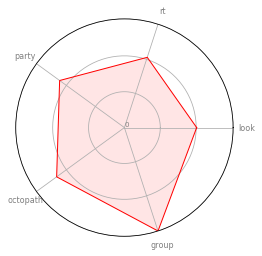

In [14]:
radar_plot_creator(words_df, time=30, seconds=30, which_five='top')
#words_df, 'top' 5 or 'bottom' 5, second grouping type in seconds

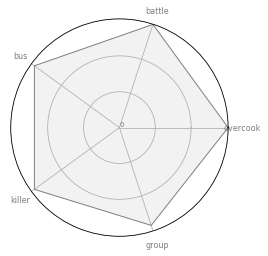

In [15]:
radar_plot_creator(words_df, time=30, seconds=30, which_five='bottom')

Identify time lag... mario party started at 6:00... became somewhat obvious at 6:40

In [ ]:
#df.loc[df['time'] == '16:07:00']

# Master Functions

In [ ]:
trend_function(time=30, seconds=5, sum_mean='sum', which_five='top', trend_radar='trend')

In [ ]:
radar_function(time=30, seconds=5, sum_mean='sum', which_five='top', trend_radar='trend')